# To predict true Deaths Rate with Age  

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading train and test dataset
df=pd.read_csv('covid19_wordometer.csv')
df_age=pd.read_csv('covid_19_1.csv')

In [3]:
df.shape,df_age.shape

((6603, 9), (213, 4))

In [4]:
df.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0


In [5]:
df_age.head()

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,USA,0.189,0.657,0.154
1,Russia,0.176,0.682,0.142
2,Spain,0.147,0.659,0.194
3,Brazil,0.217,0.697,0.086
4,UK,0.177,0.638,0.185


In [6]:
#checking missing values
print(df.isnull().sum())
df_age.isnull().sum()


Date                      0
Country                   0
Population                0
Total Tests            1098
Total Cases              49
Total Deaths           1236
Total Recovered         285
Serious or Critical    2486
Active Cases             59
dtype: int64


Country                      0
Fraction age 0-14 years     37
Fraction age 15-64 years    37
Fraction age 65+ years      37
dtype: int64

There are missing values present in the dataset that will remove later

In [7]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 6603 non-null   object 
 1   Country              6603 non-null   object 
 2   Population           6603 non-null   int64  
 3   Total Tests          5505 non-null   float64
 4   Total Cases          6554 non-null   float64
 5   Total Deaths         5367 non-null   float64
 6   Total Recovered      6318 non-null   float64
 7   Serious or Critical  4117 non-null   float64
 8   Active Cases         6544 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 464.4+ KB


In [8]:
df_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   213 non-null    object 
 1   Fraction age 0-14 years   176 non-null    float64
 2   Fraction age 15-64 years  176 non-null    float64
 3   Fraction age 65+ years    176 non-null    float64
dtypes: float64(3), object(1)
memory usage: 6.8+ KB


 Date and Country are object datatype and remaining columns are int and float type

# Summary Statistics

In [9]:
df.describe()

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
count,6.603000e+03,5.505000e+03,6.554000e+03,5367.000000,6318.000000,4117.000000,6.544000e+03
mean,3.637913e+07,2.167252e+05,1.692968e+04,1416.252096,5855.424185,386.748360,9.964142e+03
std,1.411537e+08,7.595143e+05,8.861467e+04,6645.247810,23467.641235,1658.428324,6.541025e+04
min,8.010000e+02,1.000000e+01,1.000000e+00,0.000000,1.000000,1.000000,0.000000e+00
25%,8.672680e+05,2.690000e+03,7.900000e+01,6.000000,26.000000,3.000000,2.600000e+01
50%,6.859926e+06,2.547800e+04,6.135000e+02,24.000000,219.000000,13.000000,2.720000e+02
75%,2.546422e+07,1.437810e+05,4.877500e+03,199.000000,1394.750000,89.000000,2.041000e+03
max,1.439324e+09,1.230074e+07,1.550294e+06,91981.000000,356383.000000,18671.000000,1.101930e+06


Observations:
    1)Minimum deaths are 0 and maximum are 91981
    2)Minimum recovered are 1 and maximum are 356383
    3)There may be outliers present as  maximum difference in 75% and max count

In [10]:
#renaming columns for easy usage
df.rename(columns={"Date":"date","Country":"country","Population":"population","Total Tests":"tests","Total Deaths":"deaths","Total Recovered":"recovered","Total Cases":"total cases","Active Cases":"active"},inplace=True)
df_age.rename(columns={"Country":"country","Fraction age 0-14 years":"age 0-14","Fraction age 15-64 years":"age 15-64","Fraction age 65+ years":"age 65+"},inplace=True)

In [11]:
#ckecking unique categories
df.nunique()

date                     31
country                 213
population              213
tests                  3173
total cases            3257
deaths                 1185
recovered              2268
Serious or Critical     529
active                 2680
dtype: int64

## Data Visualization

[Text(0, 0.5, 'country'), Text(0.5, 0, 'total cases')]

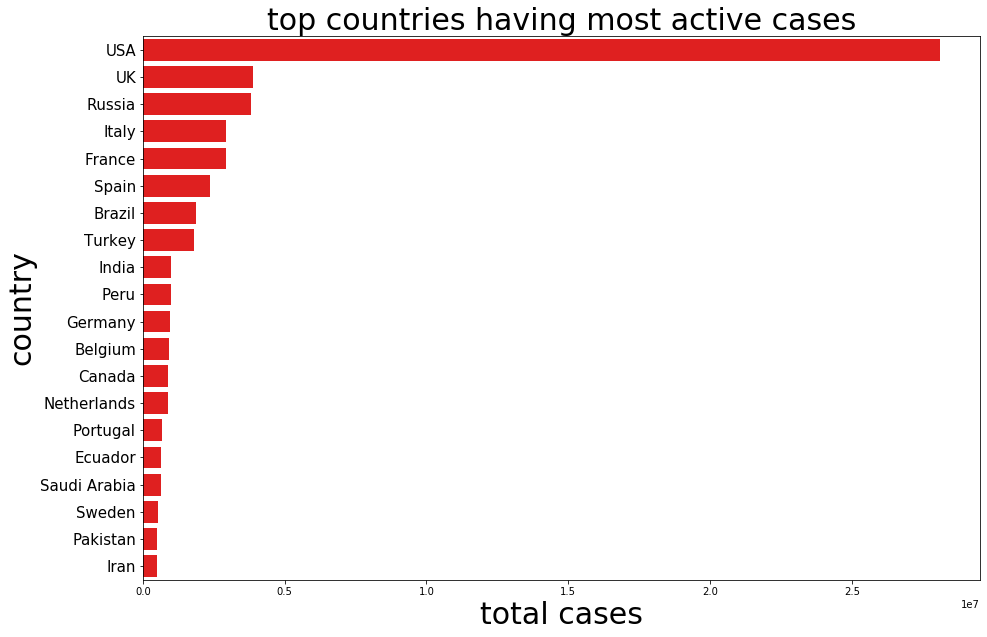

In [12]:
#lets check the active cases
plt.figure(figsize=(15,10))
plt.xticks(fontsize=10)
plt.yticks(fontsize=15)
plt.ylabel("Country",fontsize=30)
plt.xlabel("total cases",fontsize=30)
plt.title("top countries having most active cases",fontsize=30)
top_actives=df.groupby(by="country")["active"].sum().sort_values(ascending=False).head(20).reset_index()
ax=sns.barplot(x=top_actives.active,y=top_actives.country,color="r")
ax.set(ylabel="country",xlabel="total cases")


USA is having most active cases followed by UK

[Text(0, 0.5, 'country'), Text(0.5, 0, 'total cases')]

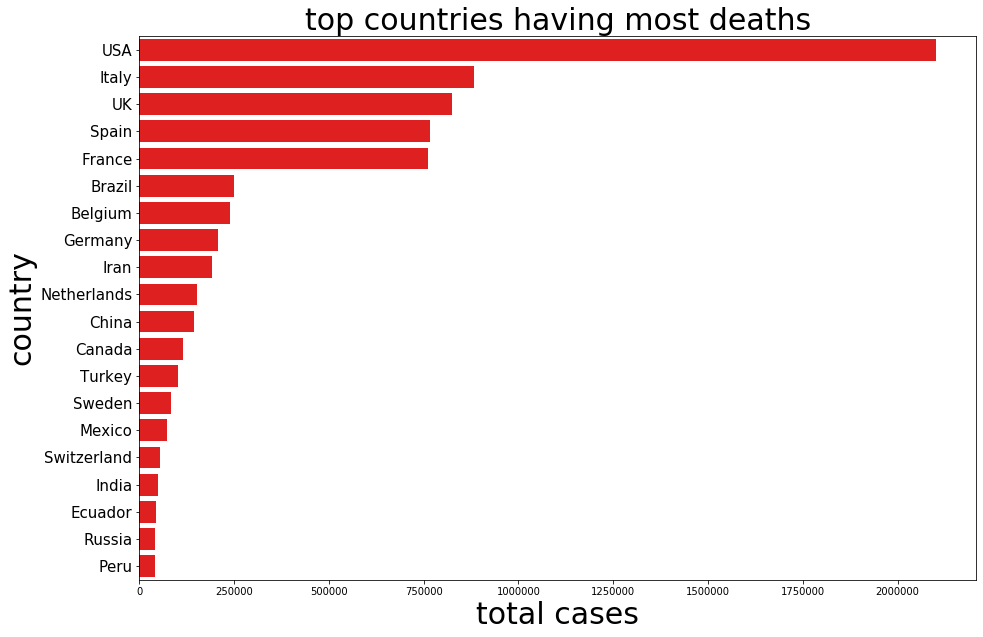

In [13]:
#lets check deaths
plt.figure(figsize=(15,10))
plt.xticks(fontsize=10)
plt.yticks(fontsize=15)
plt.ylabel("Country",fontsize=30)
plt.xlabel("total cases",fontsize=30)
plt.title("top countries having most deaths",fontsize=30)
top=df.groupby(by="country")["deaths"].sum().sort_values(ascending=False).head(20).reset_index()
ax=sns.barplot(x=top.deaths,y=top.country,color="r")
ax.set(ylabel="country",xlabel="total cases")


USA is having most deaths followed by Italy

[Text(0, 0.5, 'country'), Text(0.5, 0, 'total cases')]

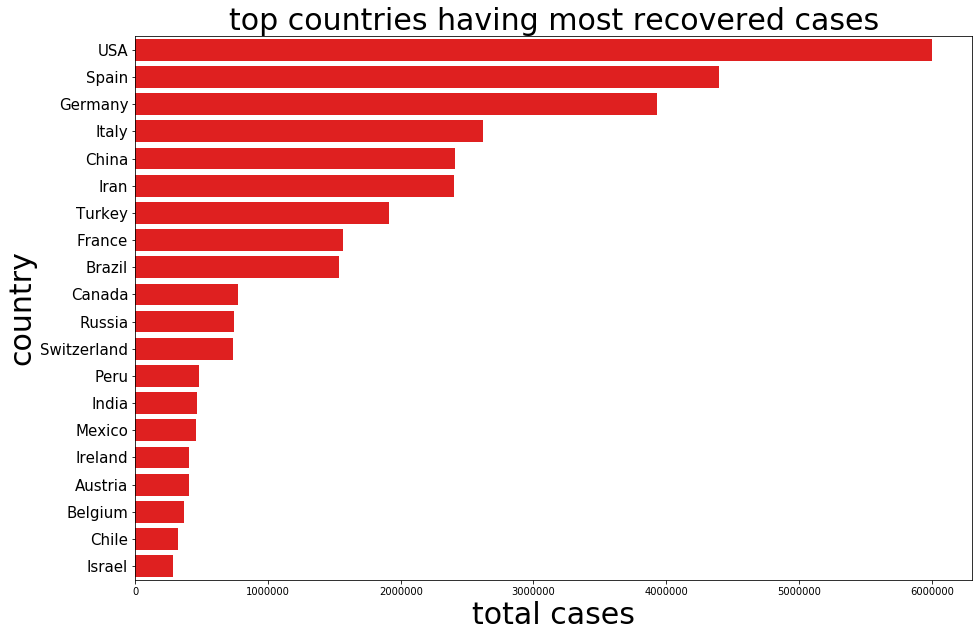

In [14]:
#lets check for recovered cases
plt.figure(figsize=(15,10))
plt.xticks(fontsize=10)
plt.yticks(fontsize=15)
plt.ylabel("Country",fontsize=30)
plt.xlabel("total cases",fontsize=30)
plt.title("top countries having most recovered cases",fontsize=30)
top=df.groupby(by="country")["recovered"].sum().sort_values(ascending=False).head(20).reset_index()
ax=sns.barplot(x=top.recovered,y=top.country,color="r")
ax.set(ylabel="country",xlabel="total cases")


Recovered cases are more in USA followed by Spain

[Text(0, 0.5, 'country'), Text(0.5, 0, 'total tests')]

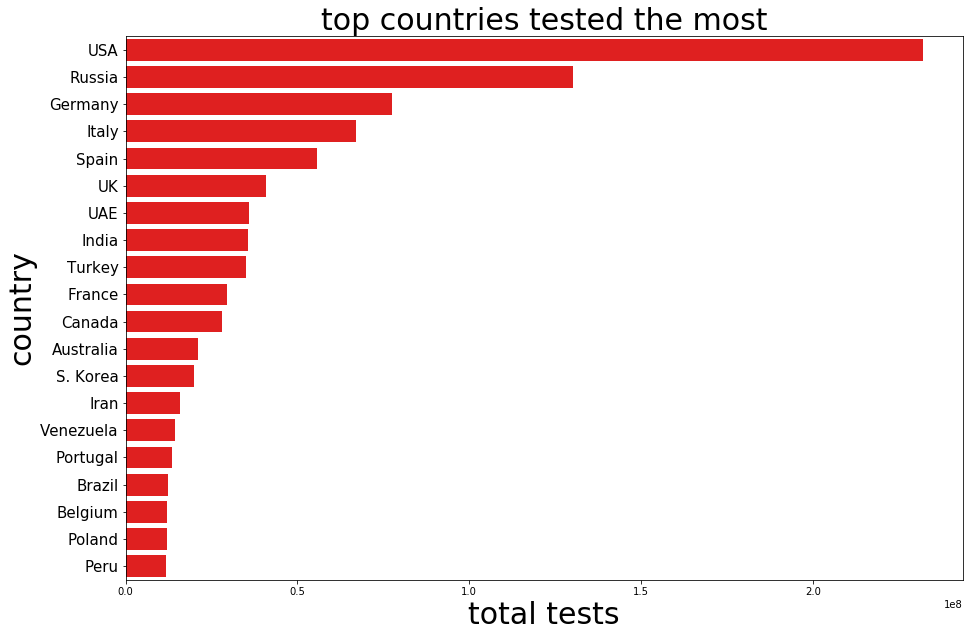

In [15]:
#lets check for total tests
plt.figure(figsize=(15,10))
plt.xticks(fontsize=10)
plt.yticks(fontsize=15)
plt.ylabel("Country",fontsize=30)
plt.xlabel("total tests",fontsize=30)
plt.title("top countries tested the most",fontsize=30)
top=df.groupby(by="country")["tests"].sum().sort_values(ascending=False).head(20).reset_index()
ax=sns.barplot(x=top.tests,y=top.country,color="r")
ax.set(ylabel="country",xlabel="total tests")


USA has performed most of the tests followed by Russia

[Text(0, 0.5, 'total cases'), Text(0.5, 0, 'tests')]

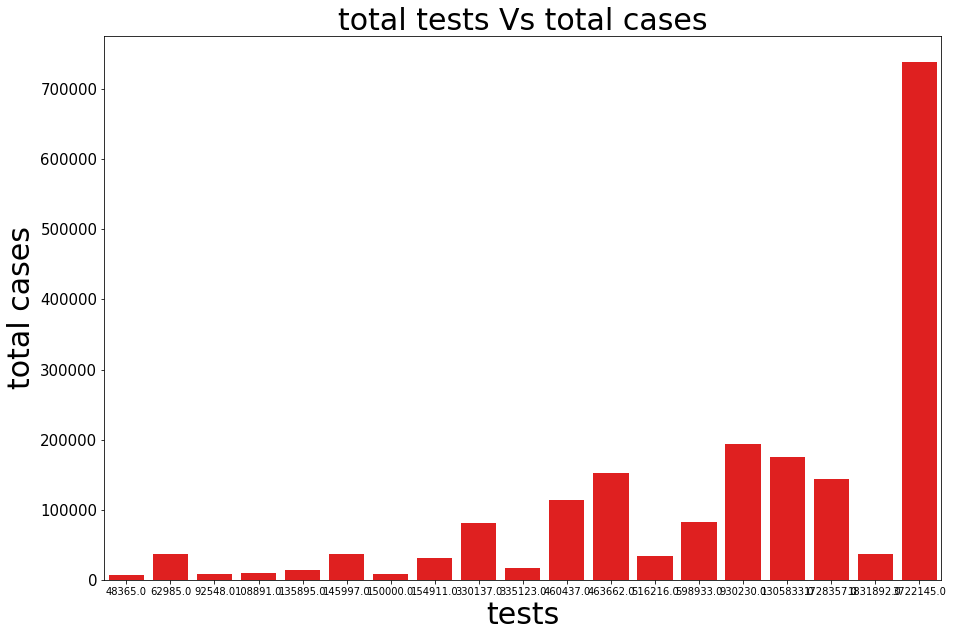

In [16]:
#lets check for total tests Vs total cases
plt.figure(figsize=(15,10))
plt.xticks(fontsize=10)
plt.yticks(fontsize=15)
plt.ylabel("total cases",fontsize=30)
plt.xlabel("tests",fontsize=30)
plt.title("total tests Vs total cases",fontsize=30)
ax=sns.barplot(x=df['tests'].head(20),y=df['total cases'].head(20),color="r")
ax.set(ylabel="total cases",xlabel="tests")


If the tests are more then total cases are more at some points

In [17]:
#Generating last date table
from datetime import datetime
select_date=datetime.strptime("18/05/2020","%d/%m/%Y")
lastdate_df=df.loc[df['date']==select_date.strftime("%Y-%m-%d"),:].reset_index(drop=True)
lastdate_df


,date,country,population,tests,total cases,deaths,recovered,Serious or Critical,active
0,2020-05-18,USA,330774664,12300744.0,1550294.0,91981.0,356383.0,16868.0,1101930.0
1,2020-05-18,Russia,145927292,7147014.0,290678.0,2722.0,70209.0,2300.0,217747.0
2,2020-05-18,Spain,46752703,3037840.0,278188.0,27709.0,196958.0,1152.0,53521.0
3,2020-05-18,Brazil,212380932,735224.0,255368.0,16853.0,100459.0,8318.0,138056.0
4,2020-05-18,UK,67844241,2682716.0,246406.0,34796.0,NaN,1559.0,NaN
...,...,...,...,...,...,...,...,...,...
208,2020-05-18,St. Barth,9874,NaN,6.0,NaN,6.0,NaN,0.0
209,2020-05-18,Western Sahara,595462,NaN,6.0,NaN,6.0,NaN,0.0
210,2020-05-18,Anguilla,14987,NaN,3.0,NaN,3.0,NaN,0.0
211,2020-05-18,Lesotho,2140235,NaN,1.0,NaN,NaN,NaN,1.0


There are 213 countries in the dataset and population is also unique for each country

In [18]:
#Calculating death rate for each country by generating a column
lastdate_df['case fatality ratio']=lastdate_df['deaths']/lastdate_df['total cases']
lastdate_df

,date,country,population,tests,total cases,deaths,recovered,Serious or Critical,active,case fatality ratio
0,2020-05-18,USA,330774664,12300744.0,1550294.0,91981.0,356383.0,16868.0,1101930.0,0.059331
1,2020-05-18,Russia,145927292,7147014.0,290678.0,2722.0,70209.0,2300.0,217747.0,0.009364
2,2020-05-18,Spain,46752703,3037840.0,278188.0,27709.0,196958.0,1152.0,53521.0,0.099605
3,2020-05-18,Brazil,212380932,735224.0,255368.0,16853.0,100459.0,8318.0,138056.0,0.065995
4,2020-05-18,UK,67844241,2682716.0,246406.0,34796.0,NaN,1559.0,NaN,0.141214
...,...,...,...,...,...,...,...,...,...,...
208,2020-05-18,St. Barth,9874,NaN,6.0,NaN,6.0,NaN,0.0,NaN
209,2020-05-18,Western Sahara,595462,NaN,6.0,NaN,6.0,NaN,0.0,NaN
210,2020-05-18,Anguilla,14987,NaN,3.0,NaN,3.0,NaN,0.0,NaN
211,2020-05-18,Lesotho,2140235,NaN,1.0,NaN,NaN,NaN,1.0,NaN


In [19]:
#Lets consider specific country like USA
df_country=df.loc[df['country']=='USA',:].reset_index(drop=True)
df_country

,date,country,population,tests,total cases,deaths,recovered,Serious or Critical,active
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-19,USA,330774664,3861549.0,763832.0,40553.0,71003.0,13566.0,652276.0
2,2020-04-20,USA,330774664,4026360.0,792759.0,42514.0,72389.0,13951.0,677856.0
3,2020-04-21,USA,330774664,4187392.0,818744.0,45318.0,82923.0,14016.0,690503.0
4,2020-04-22,USA,330774664,4325342.0,848717.0,47659.0,84050.0,14016.0,717008.0
5,2020-04-23,USA,330774664,4696704.0,880204.0,49845.0,85922.0,14997.0,744437.0
6,2020-04-24,USA,330774664,5015602.0,925038.0,52185.0,110432.0,15097.0,762421.0
7,2020-04-25,USA,330774664,5279237.0,960651.0,54256.0,118162.0,15110.0,788233.0
8,2020-04-26,USA,330774664,5470464.0,987160.0,55413.0,118781.0,15143.0,812966.0
9,2020-04-27,USA,330774664,5696928.0,1010356.0,56797.0,138990.0,14186.0,814569.0


There are 31 entries of USA dated from 18/4/2020 to 18/5/2020

In [20]:
#lets check the countries which are having more total cases i.e. minimum cases greater than 1000
min_cases=1000
most_affected_countries=lastdate_df.loc[lastdate_df['total cases']>min_cases,:]
most_affected_countries

,date,country,population,tests,total cases,deaths,recovered,Serious or Critical,active,case fatality ratio
0,2020-05-18,USA,330774664,12300744.0,1550294.0,91981.0,356383.0,16868.0,1101930.0,0.059331
1,2020-05-18,Russia,145927292,7147014.0,290678.0,2722.0,70209.0,2300.0,217747.0,0.009364
2,2020-05-18,Spain,46752703,3037840.0,278188.0,27709.0,196958.0,1152.0,53521.0,0.099605
3,2020-05-18,Brazil,212380932,735224.0,255368.0,16853.0,100459.0,8318.0,138056.0,0.065995
4,2020-05-18,UK,67844241,2682716.0,246406.0,34796.0,NaN,1559.0,NaN,0.141214
...,...,...,...,...,...,...,...,...,...,...
97,2020-05-18,Maldives,539365,11775.0,1106.0,4.0,58.0,9.0,1044.0,0.003617
98,2020-05-18,Hong Kong,7489763,168291.0,1056.0,4.0,1025.0,1.0,27.0,0.003788
99,2020-05-18,Tunisia,11803787,41620.0,1043.0,45.0,819.0,3.0,179.0,0.043145
100,2020-05-18,Guinea-Bissau,1962083,1500.0,1032.0,4.0,38.0,NaN,990.0,0.003876


There are 102 countries which are having more than 1000 cases on 18/05/2020, on topmost is USA followed by Russia

[Text(0, 0.5, 'cases'), Text(0.5, 0, 'countries')]

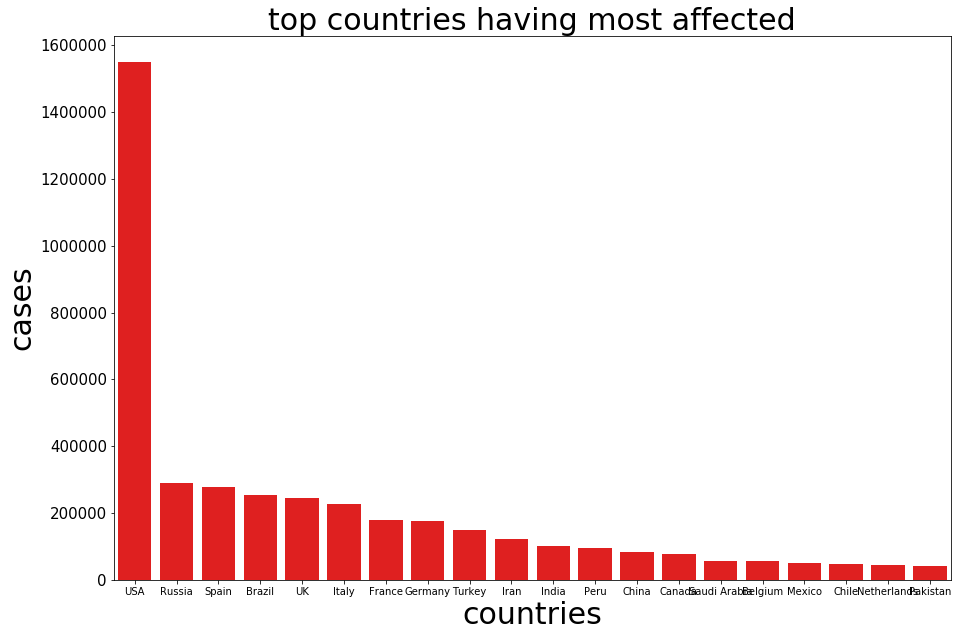

In [21]:
#lets visualize above data
plt.figure(figsize=(15,10))
plt.xticks(fontsize=10)
plt.yticks(fontsize=15)
plt.ylabel("Country",fontsize=30)
plt.xlabel("total cases",fontsize=30)
plt.title("top countries having most affected",fontsize=30)
ax=sns.barplot(x=most_affected_countries['country'].head(20),y=most_affected_countries['total cases'].head(20),color="r")
ax.set(ylabel="cases",xlabel="countries")


USA is most affected followed by Russia,Spain,Brazil

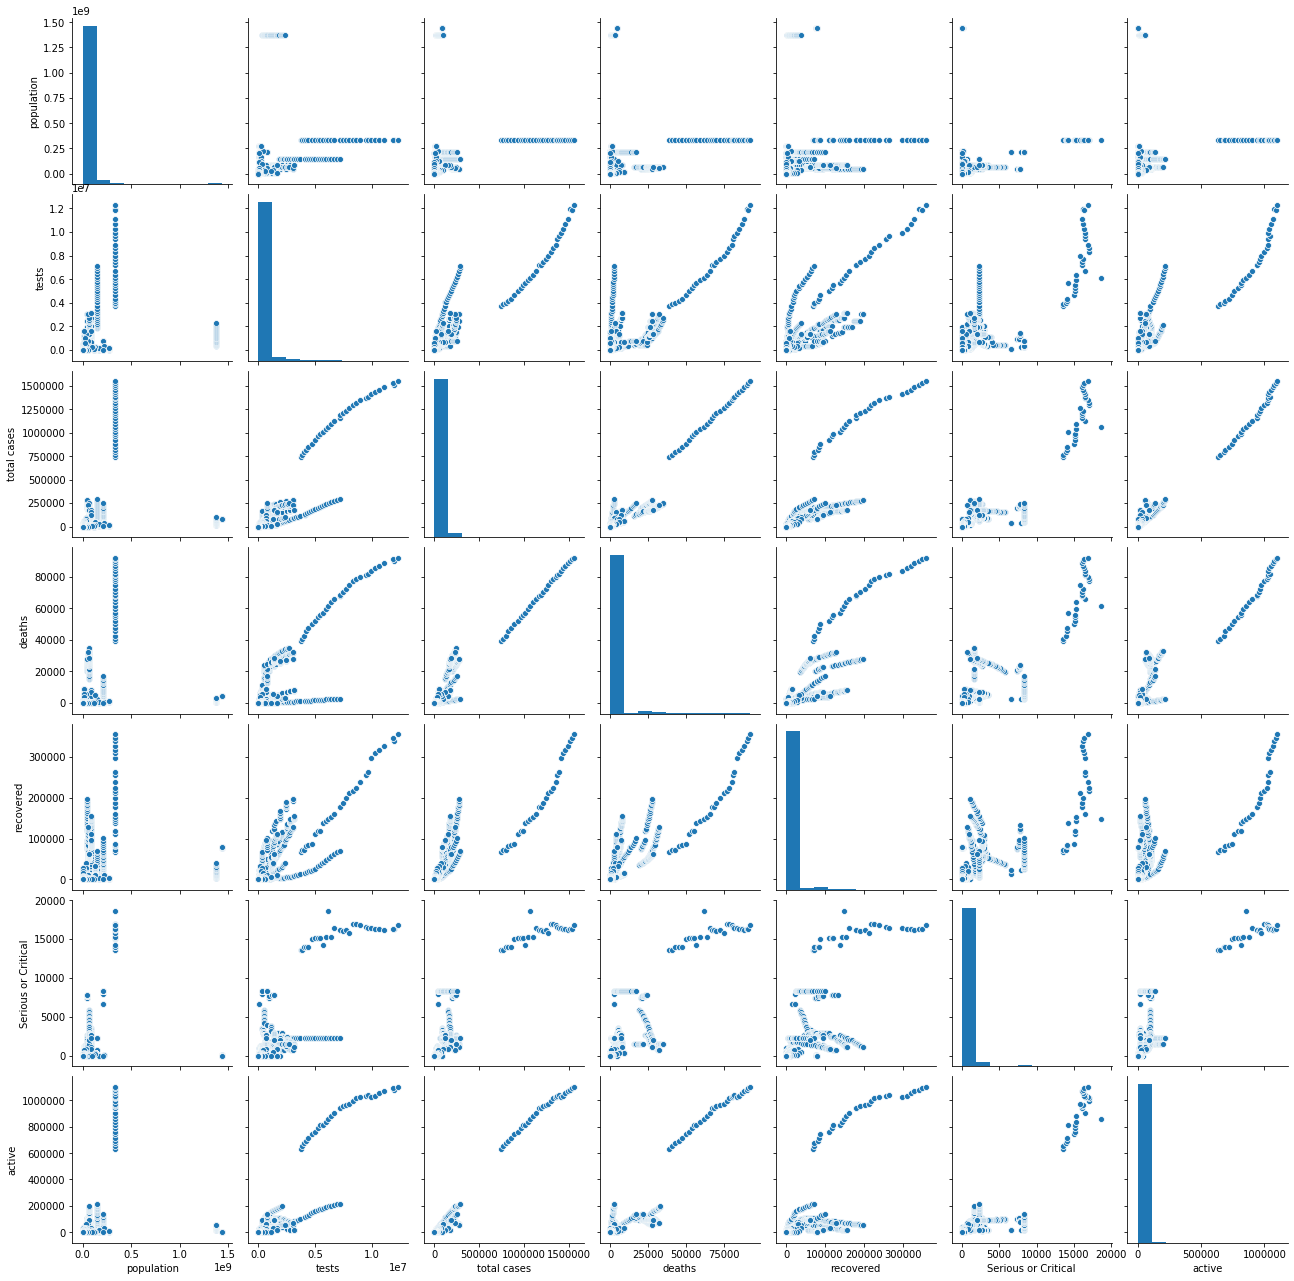

In [22]:
sns.pairplot(df)

# Now lets see relationship with age

In [23]:
df_age.head()

,country,age 0-14,age 15-64,age 65+
0,USA,0.189,0.657,0.154
1,Russia,0.176,0.682,0.142
2,Spain,0.147,0.659,0.194
3,Brazil,0.217,0.697,0.086
4,UK,0.177,0.638,0.185


In [24]:
#merging datasets
df_new=most_affected_countries.merge(df_age,on='country')
df_new

,date,country,population,tests,total cases,deaths,recovered,Serious or Critical,active,case fatality ratio,age 0-14,age 15-64,age 65+
0,2020-05-18,USA,330774664,12300744.0,1550294.0,91981.0,356383.0,16868.0,1101930.0,0.059331,0.189,0.657,0.154
1,2020-05-18,Russia,145927292,7147014.0,290678.0,2722.0,70209.0,2300.0,217747.0,0.009364,0.176,0.682,0.142
2,2020-05-18,Spain,46752703,3037840.0,278188.0,27709.0,196958.0,1152.0,53521.0,0.099605,0.147,0.659,0.194
3,2020-05-18,Brazil,212380932,735224.0,255368.0,16853.0,100459.0,8318.0,138056.0,0.065995,0.217,0.697,0.086
4,2020-05-18,UK,67844241,2682716.0,246406.0,34796.0,NaN,1559.0,NaN,0.141214,0.177,0.638,0.185
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2020-05-18,Maldives,539365,11775.0,1106.0,4.0,58.0,9.0,1044.0,0.003617,0.234,0.725,0.041
98,2020-05-18,Hong Kong,7489763,168291.0,1056.0,4.0,1025.0,1.0,27.0,0.003788,0.115,0.722,0.163
99,2020-05-18,Tunisia,11803787,41620.0,1043.0,45.0,819.0,3.0,179.0,0.043145,0.240,0.680,0.080
100,2020-05-18,Guinea-Bissau,1962083,1500.0,1032.0,4.0,38.0,NaN,990.0,0.003876,0.407,0.555,0.030


date                    0
country                 0
population              0
tests                   6
total cases             0
deaths                  0
recovered               3
Serious or Critical    11
active                  2
case fatality ratio     0
age 0-14                1
age 15-64               1
age 65+                 1
dtype: int64


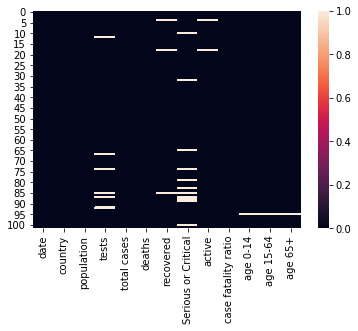

In [25]:
#checking missing values
print(df_new.isnull().sum())
sns.heatmap(df_new.isnull())

In [26]:
#treating with missing values
data_frame_list=[df_new]
for df_new in data_frame_list:
    df_new.ffill(inplace=True) # ffill fills last valid observation forward


In [27]:
#again checking missing values
df_new.isnull().sum()

date                   0
country                0
population             0
tests                  0
total cases            0
deaths                 0
recovered              0
Serious or Critical    0
active                 0
case fatality ratio    0
age 0-14               0
age 15-64              0
age 65+                0
dtype: int64

All the missing values have been removed

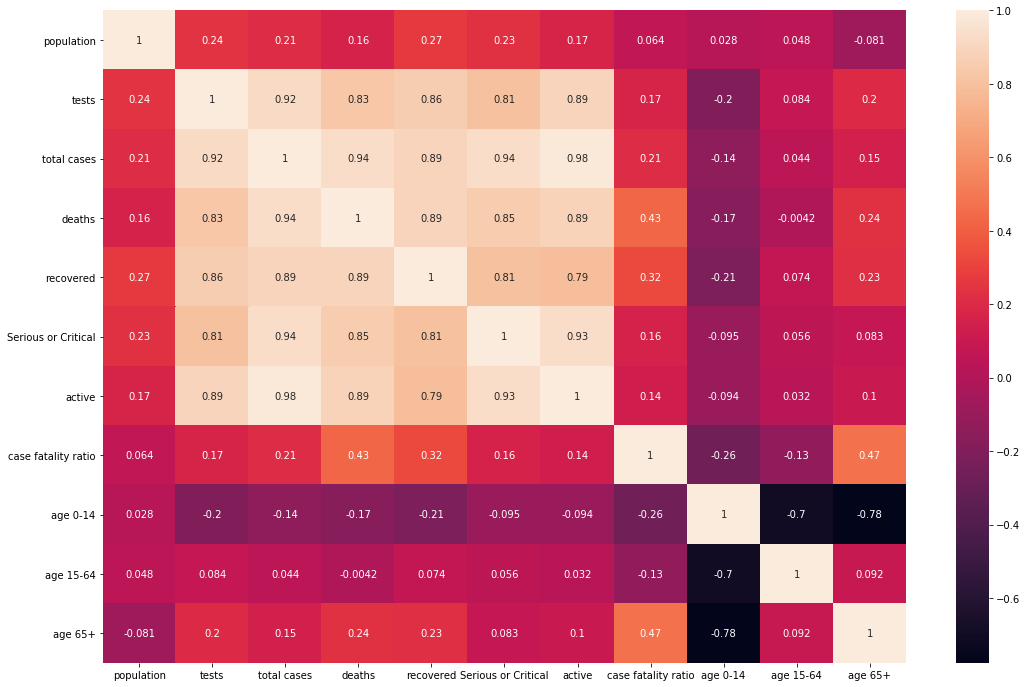

In [28]:
#checking correlation
plt.figure(figsize=(18,12))
sns.heatmap(df_new.corr(),annot=True)

case fatality ratio is negatively correlated with age 0-14 and age 15-64

In [29]:
df_new.head()

,date,country,population,tests,total cases,deaths,recovered,Serious or Critical,active,case fatality ratio,age 0-14,age 15-64,age 65+
0,2020-05-18,USA,330774664,12300744.0,1550294.0,91981.0,356383.0,16868.0,1101930.0,0.059331,0.189,0.657,0.154
1,2020-05-18,Russia,145927292,7147014.0,290678.0,2722.0,70209.0,2300.0,217747.0,0.009364,0.176,0.682,0.142
2,2020-05-18,Spain,46752703,3037840.0,278188.0,27709.0,196958.0,1152.0,53521.0,0.099605,0.147,0.659,0.194
3,2020-05-18,Brazil,212380932,735224.0,255368.0,16853.0,100459.0,8318.0,138056.0,0.065995,0.217,0.697,0.086
4,2020-05-18,UK,67844241,2682716.0,246406.0,34796.0,100459.0,1559.0,138056.0,0.141214,0.177,0.638,0.185


In [30]:
#lets make new data frame for all countries
all_countries_df=lastdate_df.merge(df_age,on='country')
all_countries_df

,date,country,population,tests,total cases,deaths,recovered,Serious or Critical,active,case fatality ratio,age 0-14,age 15-64,age 65+
0,2020-05-18,USA,330774664,12300744.0,1550294.0,91981.0,356383.0,16868.0,1101930.0,0.059331,0.189,0.657,0.154
1,2020-05-18,Russia,145927292,7147014.0,290678.0,2722.0,70209.0,2300.0,217747.0,0.009364,0.176,0.682,0.142
2,2020-05-18,Spain,46752703,3037840.0,278188.0,27709.0,196958.0,1152.0,53521.0,0.099605,0.147,0.659,0.194
3,2020-05-18,Brazil,212380932,735224.0,255368.0,16853.0,100459.0,8318.0,138056.0,0.065995,0.217,0.697,0.086
4,2020-05-18,UK,67844241,2682716.0,246406.0,34796.0,NaN,1559.0,NaN,0.141214,0.177,0.638,0.185
...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,2020-05-18,St. Barth,9874,NaN,6.0,NaN,6.0,NaN,0.0,NaN,NaN,NaN,NaN
209,2020-05-18,Western Sahara,595462,NaN,6.0,NaN,6.0,NaN,0.0,NaN,NaN,NaN,NaN
210,2020-05-18,Anguilla,14987,NaN,3.0,NaN,3.0,NaN,0.0,NaN,NaN,NaN,NaN
211,2020-05-18,Lesotho,2140235,NaN,1.0,NaN,NaN,NaN,1.0,NaN,0.354,0.601,0.045


In [31]:
#again filling missing values
data_frame_list=[all_countries_df]
for all_countries_df in data_frame_list:
    all_countries_df.ffill(inplace=True) # ffill fills last valid observation forward


In [32]:
all_countries_df.isnull().sum()

date                   0
country                0
population             0
tests                  0
total cases            0
deaths                 0
recovered              0
Serious or Critical    0
active                 0
case fatality ratio    0
age 0-14               0
age 15-64              0
age 65+                0
dtype: int64

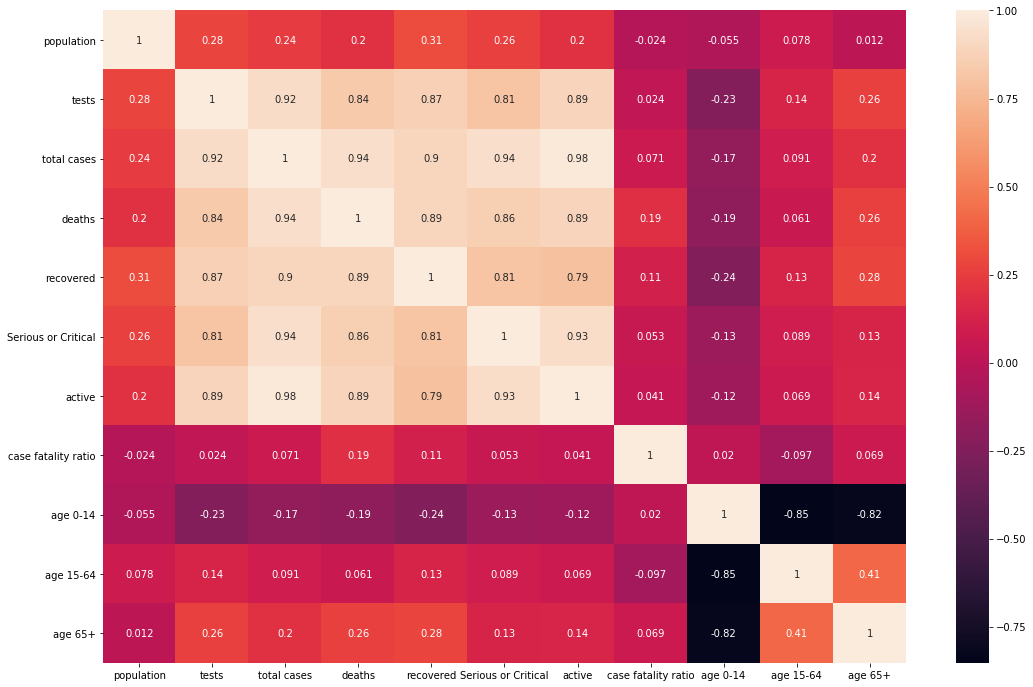

In [33]:
#checking correlation
plt.figure(figsize=(18,12))
sns.heatmap(all_countries_df.corr(),annot=True)

In [34]:
#dropping age 15-64 as it is negatively correalted and date column also as we have considered for single date
all_countries_df.drop(columns=['date','age 15-64','population'],inplace=True)

In [35]:
#converting all the countries to numerical representation
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
df1=all_countries_df.iloc[:,0].values
all_countries_df.iloc[:,0]=l.fit_transform(df1.astype(str))

In [36]:
all_countries_df.head()

,country,tests,total cases,deaths,recovered,Serious or Critical,active,case fatality ratio,age 0-14,age 65+
0,201,12300744.0,1550294.0,91981.0,356383.0,16868.0,1101930.0,0.059331,0.189,0.154
1,158,7147014.0,290678.0,2722.0,70209.0,2300.0,217747.0,0.009364,0.176,0.142
2,180,3037840.0,278188.0,27709.0,196958.0,1152.0,53521.0,0.099605,0.147,0.194
3,26,735224.0,255368.0,16853.0,100459.0,8318.0,138056.0,0.065995,0.217,0.086
4,200,2682716.0,246406.0,34796.0,100459.0,1559.0,138056.0,0.141214,0.177,0.185


In [37]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(all_countries_df))
print(z)
threshold=3
print(np.where(z>3))

[[ 1.54503887 11.23136009 13.34145294 ...  0.21363364  0.90101395
   1.17612228]
 [ 0.84570549  6.4110753   2.33865418 ...  0.9428758   1.02478034
   0.97673986]
 [ 1.20350397  2.56776396  2.22955351 ...  1.14579329  1.30087459
   1.84073036]
 ...
 [ 1.64262028  0.27319455  0.20040417 ...  1.73356521  0.7174696
   0.75124115]
 [ 0.06505427  0.27319455  0.20042164 ...  1.73356521  0.66986714
   0.63493473]
 [ 0.95955046  0.27319455  0.20042164 ...  1.73356521  0.66986714
   0.63493473]]
(array([  0,   0,   0,   0,   0,   0,   1,   2,   2,   3,   4,   5,   5,
         6,   7,  36, 169, 180], dtype=int64), array([1, 2, 3, 4, 5, 6, 1, 3, 4, 5, 3, 3, 4, 3, 4, 9, 7, 7], dtype=int64))


In [38]:
df2=all_countries_df[(z<3).all (axis=1)]
df2

,country,tests,total cases,deaths,recovered,Serious or Critical,active,case fatality ratio,age 0-14,age 65+
8,197,1650135.0,150593.0,4171.0,111577.0,903.0,34845.0,0.027697,0.250,0.082
9,93,701640.0,122492.0,7057.0,95661.0,2294.0,19774.0,0.057612,0.237,0.054
10,91,2302792.0,100328.0,3156.0,39233.0,2294.0,57939.0,0.031457,0.278,0.060
11,152,661132.0,94933.0,2789.0,30306.0,866.0,61838.0,0.029379,0.274,0.072
12,42,661132.0,82954.0,4634.0,78238.0,8.0,82.0,0.055862,0.177,0.106
...,...,...,...,...,...,...,...,...,...,...
208,182,357.0,6.0,1.0,6.0,4.0,0.0,0.125000,0.359,0.038
209,209,357.0,6.0,1.0,6.0,4.0,0.0,0.125000,0.359,0.038
210,5,357.0,3.0,1.0,3.0,4.0,0.0,0.125000,0.359,0.038
211,110,357.0,1.0,1.0,3.0,4.0,1.0,0.125000,0.354,0.045


In [39]:
#checking skewness
df2.skew()

country                0.019705
tests                  4.108062
total cases            4.162806
deaths                 4.600781
recovered              5.850797
Serious or Critical    7.178768
active                 3.688051
case fatality ratio    0.896317
age 0-14               0.189457
age 65+                0.928588
dtype: float64

In [40]:
for column in df2.columns:
    if df2.skew().loc[column]>0.55:
        df2[column]=np.log1p(df2[column])

In [41]:
df2.skew()

country                0.019705
tests                 -0.326592
total cases           -0.099534
deaths                 0.695638
recovered              0.072419
Serious or Critical    1.274604
active                -0.206363
case fatality ratio    0.831674
age 0-14               0.189457
age 65+                0.879273
dtype: float64

## Feature Selection

In [42]:
#splitting into x and y
x=df2.drop('case fatality ratio',axis=1)
x.shape

(202, 9)

In [43]:
y=df2['case fatality ratio']
y.shape

(202,)

## Model Building

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=55)

In [46]:
#feature scaling
#scaling the data
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

## checking scoring for LinearRegression model


In [47]:
def max_r2_score(reg,x,y):
    max_r_score=0
    for r_state in range(42,100):
        
        x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=r_state)
        reg.fit(x_train,y_train)
        y_pred=reg.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print('r2 score correspond to random state:',r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
        print()
        print("max r_score correspond to",final_r_state,'is',max_r_score)
    return final_r_state
        

        



In [48]:
lr=LinearRegression()
r_state=max_r2_score(lr,x,y)

r2 score correspond to random state: 42 is 0.7434974610666683

max r_score correspond to 42 is 0.7434974610666683
r2 score correspond to random state: 43 is 0.830457988770305

max r_score correspond to 43 is 0.830457988770305
r2 score correspond to random state: 44 is 0.6828663637957512

max r_score correspond to 43 is 0.830457988770305
r2 score correspond to random state: 45 is 0.8057445944861042

max r_score correspond to 43 is 0.830457988770305
r2 score correspond to random state: 46 is 0.7732364787351478

max r_score correspond to 43 is 0.830457988770305
r2 score correspond to random state: 47 is 0.7770435241573286

max r_score correspond to 43 is 0.830457988770305
r2 score correspond to random state: 48 is 0.7745482282002638

max r_score correspond to 43 is 0.830457988770305
r2 score correspond to random state: 49 is 0.7869546551032456

max r_score correspond to 43 is 0.830457988770305
r2 score correspond to random state: 50 is 0.7512826234681874

max r_score correspond to 43 is 0

In [49]:
pred_lr=lr.predict(x_test)
pred_lr

array([0.20241801, 0.19788494, 0.16022916, 0.14271991, 0.14483313,
       0.21219758, 0.1665811 , 0.11606909, 0.20605351, 0.15750818,
       0.21971814, 0.08145668, 0.16184525, 0.22730648, 0.23497571,
       0.08625327, 0.14537032, 0.09486248, 0.15931342, 0.10358447,
       0.17993906, 0.10812692, 0.16262383, 0.16734902, 0.23520137,
       0.19415539, 0.16458622, 0.1707172 , 0.22322905, 0.03934339,
       0.21233717, 0.19422297, 0.23156797, 0.15774054, 0.22479982,
       0.22837621, 0.22038827, 0.1616587 , 0.04046004, 0.20864518,
       0.18241911])

In [50]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
model=[KNeighborsRegressor(), DecisionTreeRegressor(),LinearRegression()]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("r2 score:",r2_score(y_test,predm))
    print("mean squared error:",mean_squared_error(y_test,predm))
    print("RSME:",np.sqrt(mean_squared_error(y_test,predm)))

r2 score: 0.44671715818624635
mean squared error: 0.0006813724637274349
RSME: 0.02610311214639808
r2 score: 0.6490849694127127
mean squared error: 0.0004321548056079704
RSME: 0.02078833340140499
r2 score: 0.8359203928499478
mean squared error: 0.00020206541342356445
RSME: 0.014214971453491015


Among above linear regression  is working good

In [52]:
#cross validation
from sklearn.model_selection import cross_val_score
lgrscores=cross_val_score(LinearRegression(),x,y,cv=5)
print(lgrscores)
print(lgrscores.mean(),lgrscores.std())

[0.59517723 0.6777603  0.83185609 0.80237017 0.58531523]
0.698495805554405 0.10245914326976086


In [53]:
#lasso regression
from sklearn.linear_model import Lasso,Ridge
ls=Lasso(alpha=0.00001)
#alpha is 1.0 default
ls.fit(x_train,y_train)
ls.score(x_train,y_train)


0.801530664526013

In [54]:
# try to minimize the coefficient variance
rd=Ridge(alpha=0.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.801534833917065

In [55]:
from sklearn.model_selection import cross_val_score
lgrscores=cross_val_score(ls,x,y,cv=5)
print(lgrscores)
print(lgrscores.mean(),lgrscores.std())

[0.5989431  0.67918034 0.83732197 0.80144439 0.57129064]
0.697636088367392 0.10614367757676432


In [56]:
from sklearn.model_selection import cross_val_score
lgrscores=cross_val_score(rd,x,y,cv=5)
print(lgrscores)
print(lgrscores.mean(),lgrscores.std())

[0.59521495 0.67777    0.83188716 0.80236714 0.58527312]
0.6985024737207264 0.10246792449103483


In [57]:
#ElasticNet is a combination of both Lasso and Ridge
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)
enr.fit(x_train,y_train)
pred=enr.predict(x_test)
print("r2 score:",r2_score(y_test,pred))
print("mean squared error:",mean_squared_error(y_test,pred))
print("RSME:",np.sqrt(mean_squared_error(y_test,pred)))
print('mean absolute error:',mean_absolute_error(y_test,pred))


r2 score: 0.8382275811957209
mean squared error: 0.00019922409161013302
RSME: 0.014114676461404739
mean absolute error: 0.01198574123347703


## Boosting Techniques

In [58]:
#checking scoring for Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
print("r2 score:",r2_score(y_test,y_pred))
print("mean squared error:",mean_squared_error(y_test,y_pred))
print("RSME:",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score: 0.6257515027647744
mean squared error: 0.0004608901656366471
RSME: 0.021468352653071617


In [59]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
predrf=ad.predict(x_test)
ad.score(x_train,y_train)

0.8069713955671565

In [61]:
#among all linear regression model is working fine so lets save that model
from sklearn.externals import joblib
joblib.dump(LinearRegression(),'covi19.pkl')

['covi19.pkl']